<font size=4>
The following code is used to generate a list of random hamiltonians and their exact properties. 
<br>
The data generated can be used as a convenient reference for later calculation. 
</font>

In [9]:
import numpy as np
import netket as nk
import jax
import jax.numpy as jnp
import time
import matplotlib.pyplot as plt

import models as myModels
import auxillary as aux

n_sites = 12
point_num = 100
key = jax.random.PRNGKey(11111)
key, *subkeys = jax.random.split(key, 200)
data_list0 = []

graph  = nk.graph.Chain(n_sites, pbc=True)
#print("graph generated!")

hilbert = nk.hilbert.Spin(s=0.5, N=n_sites)
#print("hilbert space generated!")

s0, sx, sy, sz = [[1, 0], [0, 1]], [[0, 1], [1, 0]], [[0, -1j], [1j, 0]], [[1, 0], [0, -1]]
s = [s0, sx, sy, sz]

for idx0 in range(point_num):

    #idx0 = 7

    subkeys[idx0], *subsubkeys = jax.random.split(subkeys[idx0], 200)

    J = jax.random.uniform(key=subsubkeys[0], shape=(4,4))-0.5
    J = (J+J.T)/2.0
    bond = 0
    for idx1 in range(4):
        for idx2 in range(4):
            bond += J[idx1, idx2]*np.kron(s[idx1], s[idx2])

    bond_ops = [bond, ]
    site_ops = [-1*np.array(sx)]
    hamiltonian = nk.operator.LocalOperator(hilbert, dtype=complex)
    for i in range(n_sites):
        j = (i+1)%n_sites
        hamiltonian += nk.operator.LocalOperator(hilbert, bond, [i, j])
    #print("Hamiltonian generated!")

    exact_results = aux.Exact(hamiltonian)
    exact_gs_energy = exact_results.gs_energy
    corrlen = exact_results.CorrLen()
    long_corr = exact_results.Long_Range_Corr()
    data_list0.append([idx0, exact_gs_energy[0], corrlen, long_corr])

    if idx0%10==0:
        print(idx0)
    #print("energy:", exact_gs_energy)
    #print("corrlen:", corrlen)
    #print("long_corr:", long_corr)
    #print("*****************************************************************************************")




0
10
20
30
40
50
60
70
80
90


<font size=4>
The following code is used to plot the relation between correlation length and long range correlation value.
<br> 
The data used is generated from previous code block.
</font>

Text(0, 0.5, 'long range correlation')

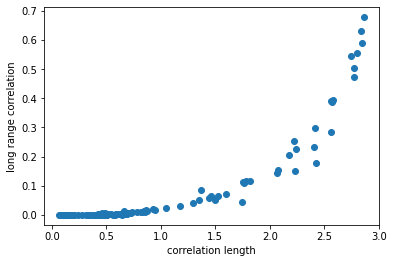

In [10]:
data_list0=np.array(data_list0)
plt.scatter(data_list0[:, 2], data_list0[:, 3])
plt.xlabel("correlation length")
plt.ylabel("long range correlation")

In [13]:
data_list0.round(4)

array([[ 0.00000e+00, -5.74150e+00,  7.00900e-01,  7.70000e-03],
       [ 1.00000e+00, -6.41260e+00,  4.80200e-01,  8.00000e-04],
       [ 2.00000e+00, -7.31560e+00,  4.85900e-01,  5.40000e-03],
       [ 3.00000e+00, -5.70860e+00,  7.28600e-01,  6.40000e-03],
       [ 4.00000e+00, -3.77400e+00,  3.46700e-01,  1.00000e-03],
       [ 5.00000e+00, -1.55876e+01,  3.32500e-01,  4.00000e-04],
       [ 6.00000e+00, -1.78200e+01,  1.62600e-01,  0.00000e+00],
       [ 7.00000e+00, -1.56969e+01,  5.95000e-01,  2.50000e-03],
       [ 8.00000e+00, -1.36082e+01,  5.82900e-01,  7.00000e-04],
       [ 9.00000e+00, -1.05738e+01,  8.29800e-01,  1.04000e-02],
       [ 1.00000e+01, -4.70360e+00,  2.40190e+00,  2.34200e-01],
       [ 1.10000e+01, -6.25260e+00,  2.56110e+00,  3.89800e-01],
       [ 1.20000e+01, -2.38874e+01,  2.72900e-01,  5.00000e-04],
       [ 1.30000e+01, -1.12285e+01,  2.21830e+00,  2.54200e-01],
       [ 1.40000e+01, -1.39538e+01,  9.50200e-01,  1.63000e-02],
       [ 1.50000e+01, -1.

<font size=4>
The following code is used to generate data for error-vs-corrlen plot.
<br>
When point_num and trial_num is set to 1, the following code can also be used for detailed analysis of the calculation of a single hamiltonian. 
<br>
(using the following setting, it takes about point_num*trial_num*40 seconds to run the code)
<font>

In [6]:
import numpy as np
import netket as nk
import jax
import jax.numpy as jnp
import time
import matplotlib.pyplot as plt

import models as myModels
import auxillary as aux

n_sites = 12
point_num = 1 # number of random hamiltonians
trial_num = 1 # number of trials for each random hamiltonian
iter_num = 1500
key = jax.random.PRNGKey(11111)
key, *subkeys = jax.random.split(key, 200) # 200 should be larger than poin_num
data_list = []

graph  = nk.graph.Chain(n_sites, pbc=True)
#print("graph generated!")

hilbert = nk.hilbert.Spin(s=0.5, N=n_sites)
#print("hilbert space generated!")

s0, sx, sy, sz = [[1, 0], [0, 1]], [[0, 1], [1, 0]], [[0, -1j], [1j, 0]], [[1, 0], [0, -1]]
s = [s0, sx, sy, sz]

for idx0 in range(point_num):
    "this loop loops over different random hamiltonians"
    
    print("system ", idx0)
    idx0 = 5
    
    subkeys[idx0], *subsubkeys = jax.random.split(subkeys[idx0], 200) # 200 should be larger than trial_num
    "generate enough subsubkeys for later parameters initialization"

    print("key for random hamiltonian: ", subsubkeys[0])
    J = jax.random.uniform(key=subsubkeys[0], shape=(4,4))-0.5
    J = (J+J.T)/2.0
    bond = 0
    for idx1 in range(4):
        for idx2 in range(4):
            bond += J[idx1, idx2]*np.kron(s[idx1], s[idx2])

    bond_ops = [bond, ]
    site_ops = [-1*np.array(sx)]
    hamiltonian = nk.operator.LocalOperator(hilbert, dtype=complex)
    for i in range(n_sites):
        j = (i+1)%n_sites
        hamiltonian += nk.operator.LocalOperator(hilbert, bond, [i, j])
    #print("Hamiltonian generated!")

    exact_results = aux.Exact(hamiltonian)
    exact_gs_energy = exact_results.gs_energy
    corrlen = exact_results.CorrLen()
    long_corr = exact_results.Long_Range_Corr()
    print("\n")
    print('exact ground-state energy: ',exact_gs_energy)
    print("corrlen: ", corrlen)
    print("long range correlation: ", long_corr)
    print("\n")

    model = myModels.mySymmRBM(alpha=1, filter_len=n_sites)
    #model = myModels.myRBM(alpha = 2)
    #model = nk.models.RBM(alpha = 2)
    #symmetries = graph.translations()
    #model = nk.models.RBMSymm(symmetries=symmetries, alpha=1, dtype=complex)
    #print("model generated!")

    #sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, n_chains=20, graph=graph)
    sampler = nk.sampler.MetropolisLocal(hilbert=hilbert, n_chains=20)
    #sampler = nk.sampler.MetropolisHamiltonian(hilbert=hilbert, hamiltonian=hamiltonian, n_chains=20)

    #op = nk.optimizer.Sgd(learning_rate=0.001)
    #op = nk.optimizer.Adam(learning_rate=0.01)
    #op = nk.optimizer.AdaGrad(learning_rate=0.01)
    #op = nk.optimizer.Momentum(learning_rate=0.01)
    #sr = nk.optimizer.SR(diag_shift=0.1)

    trial_record_list = []
    for idx1 in range(trial_num):
        "this loop tries different variational state initialization seeds"

        idx_bias = 5
        vs = nk.variational.MCState(
            sampler, model, n_samples=500, sampler_seed=int(subsubkeys[idx1+1+idx_bias][0]), seed=int(subsubkeys[idx1+1+idx_bias][1]))

        training = aux.Training(variational_state=vs, hamiltonian=hamiltonian)

        print("trial ", idx1)
        print("sampler seed: ", int(subsubkeys[idx1+1+idx_bias][0]), "seed for parameters: ", int(subsubkeys[idx1+1+idx_bias][1]))
        start = time.time()
        #training.Run0(iter_num=iter_num, lr=0.002)
        training.Run1(iter_num=iter_num, lr_list=[[0, 0.002]], sample_num_list=[[0, 500]])
        end = time.time()
        print('The RBM calculation took',end-start,'seconds')
        #approx_gs_energy = np.real(vs.expect(hamiltonian).__dict__["mean"])
        approx_gs_energy = np.average(training.log[iter_num-20:])
        print("vstate expectation energy:", approx_gs_energy.round(6))
        error = np.abs((approx_gs_energy-exact_gs_energy)/exact_gs_energy)[0]
        trial_record_list.append([idx1+idx_bias, error])
        print("error: ", error)
        print("#######################################")

    print("error list: ", trial_record_list)
    min_error = min(trial_record_list[i][1] for i in range(len(trial_record_list)))
    data_list.append([corrlen, error, min_error])
    np.save("data_test.npy", np.array(data_list))
    print("**************************************************************************************************************************")

data_list=np.array(data_list)
np.save("data_test.npy", data_list)




system  0
key for random hamiltonian:  [1226997719 2940361891]
  0%|          | 2/1500 [00:00<01:18, 18.99it/s, energy=(-2.8589-0.0968j)]

exact ground-state energy:  [-15.58761363]
corrlen:  0.33246453582855384
long range correlation:  0.00042232939745667775


trial  0
sampler seed:  3061935301 seed for parameters:  1424231089
100%|██████████| 1500/1500 [01:23<00:00, 18.05it/s, energy=(-15.0343-0.0956j)]The RBM calculation took 83.12320375442505 seconds
vstate expectation energy: (-15.068126-0.017105j)
error:  0.03334502398001216
#######################################
error list:  [[5, 0.03334502398001216]]
**************************************************************************************************************************



<font size=4>
The following code is used to plot error-vs-corrlen figure
</font>

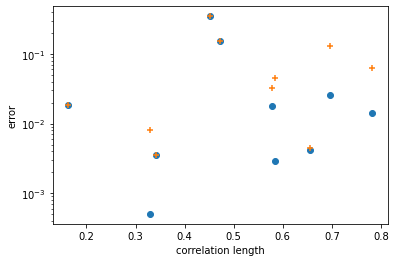

In [17]:
data_list = np.load("data_1.npy")
plt.scatter(data_list[:, 0], data_list[:, 2])
plt.scatter(data_list[:, 0], data_list[:, 1], marker="+")
plt.xlabel("correlation length")
plt.ylabel("error")
plt.yscale('log', base=10)
#plt.savefig('figure.jpg')

<font size=4>
The following code is used to plot the energy (loss) curve of training
<font>

/home/caifangxu/anaconda3/envs/SummerResearch/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'energy')

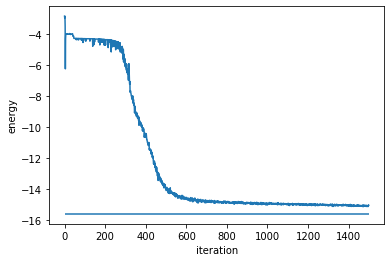

In [7]:
x_start = 0
plt.plot(np.arange(x_start, iter_num), training.log[x_start:])
#plt.scatter(np.arange(x_start, iter_num), training.log[x_start:])
plt.hlines(exact_gs_energy, xmin=x_start, xmax=iter_num)
plt.xlabel("iteration")
plt.ylabel("energy")

<font size=4>
The following code is used to plot exact and variational states' absoulute coefficients of different basis state vectors.
</font>

Text(0, 0.5, 'absolute value of coefficients')

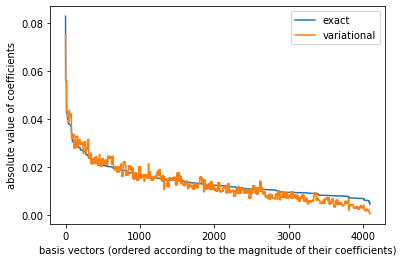

In [8]:
pp = aux.PostProcessing(vs)
coe_vs = pp.Show_Basis_Coeff(take_abs=True, precision=1.0e-10)
coe_exact = exact_results.Show_Basis_Coeff(take_abs=True, precision=1.0e-5)
coe_vs_dict = dict(coe_vs)
coe_exact_dict = dict(coe_exact)
plot_list_exact = np.array([coe_exact_dict[coe_exact[i][0]] for i in range(len(coe_exact))])
plot_list_vs = np.array([coe_vs_dict[coe_exact[i][0]] for i in range(len(coe_exact))])

plt.plot(plot_list_exact, label="exact")
plt.plot(plot_list_vs, label="variational")
plt.legend()
plt.xlabel("basis vectors (ordered according to the magnitude of their coefficients)")
plt.ylabel("absolute value of coefficients")

In [4]:
coe_vs = pp.Show_Basis_Coeff(repeat=False, take_abs=True, precision=1.0e-10)
coe_exact = exact_results.Show_Basis_Coeff(repeat=False, take_abs=True, precision=1.0e-5)
for val in coe_vs[:10]:
    print(val)
print("\n")
for val in coe_exact[:10]:
    print(val)

['111111111111', 0.08576031780339644]
['110111111111', 0.0560507424887342]
['001111111111', 0.04279894076752512]
['010111111111', 0.04012389398986298]
['110110111111', 0.0372290627570926]
['011110111111', 0.03714968018165396]
['011101111111', 0.03698638228978121]
['101111101111', 0.03618927953827224]
['000111111111', 0.03371343331741715]
['001111111101', 0.03157550545975881]


['111111111111', 0.08266740722849729]
['111110111111', 0.05588376897531857]
['001111111111', 0.04237875285861873]
['101111111110', 0.03987072344696275]
['101110111111', 0.03792838737169968]
['111110111110', 0.03777584770896297]
['011110111111', 0.03775930384591287]
['101101111111', 0.03704007063484422]
['111110001111', 0.033777872930545294]
['111010011111', 0.030466995049521068]


<font size=4>
The following code is used to plot the structure of SymmRBM's weight. 
</font>

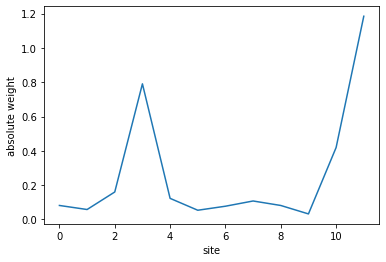

In [9]:
plt.xlabel("site")
plt.ylabel("absolute weight")
plt.plot(np.abs(vs.parameters['weight'])[0])